**✅ 1. 라이브러리 불러오기**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 평가 지표
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

**✅ 2. 데이터 로드 및 확인**

In [2]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/heart.csv"
df = pd.read_csv(url)

print("데이터 크기:", df.shape)
df.head()

데이터 크기: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**3. 상관관계 분석 (히트맵)**

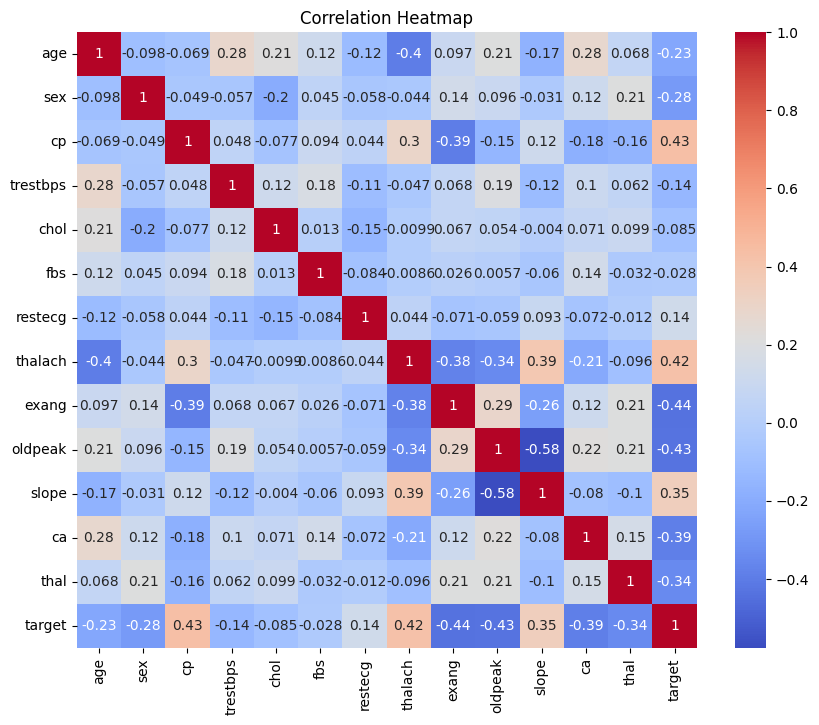

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**✅ 4. 데이터 전처리**

🎯 ① 입력(X)과 타깃(y) 분리

In [4]:
# target 컬럼이 0/1로 되어 있다고 가정
X = df.drop("target", axis=1)
y = df["target"]  # 이진 분류이므로 별도 one-hot 필요 없음

🎯 ② 데이터 정규화 (스케일링)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

🎯 ③ 학습 / 테스트 데이터 분리

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(242, 13) (242,) (61, 13) (61,)


**✅ 5. 모델 구성 및 학습**

🧠 모델 정의

In [7]:
model = Sequential()
model.add(Dense(13, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  
# 이진 분류이므로 출력층은 1개 + sigmoid

model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 32)                448       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,719
Trainable params: 1,719
Non-trainable params: 0
_________________________________________________________________


📈 학습

In [8]:
N_EPOCHS = 20
history = model.fit(
    X_train, y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
8/8 [==============================] - 0s 13ms/step - loss: 0.7001 - accuracy: 0.4959 - val_loss: 0.6888 - val_accuracy: 0.5574
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.6033 - val_loss: 0.6476 - val_accuracy: 0.6557
Epoch 3/20
8/8 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6405 - val_loss: 0.6102 - val_accuracy: 0.7541
Epoch 4/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.6942 - val_loss: 0.5763 - val_accuracy: 0.8197
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7521 - val_loss: 0.5411 - val_accuracy: 0.8361
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7810 - val_loss: 0.5056 - val_accuracy: 0.8525
Epoch 7/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7893 - val_loss: 0.4724 - val_accuracy: 0.8361
Epoch 8/20
8/8 [=================

**✅ 6. 학습 결과 시각화**

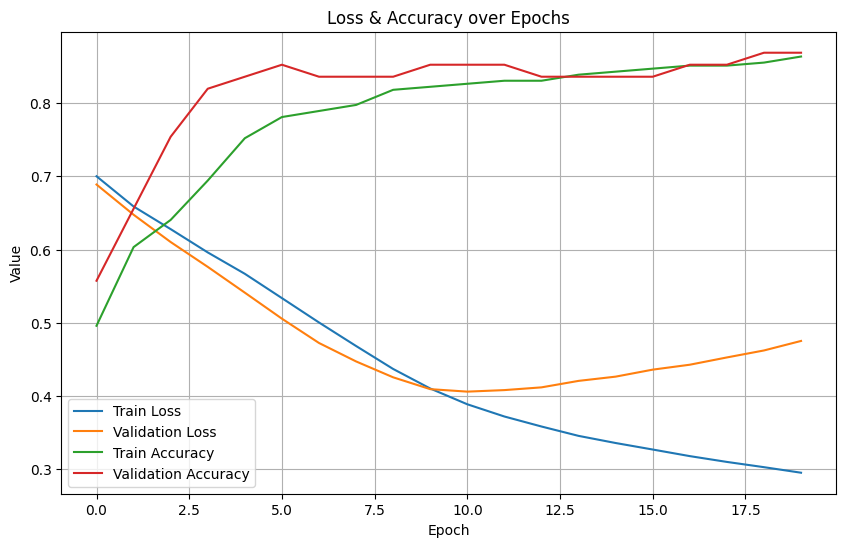

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title("Loss & Accuracy over Epochs")
plt.grid()
plt.show()

**✅ 7. 모델 평가**

In [10]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

2/2 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8689
Test Accuracy: 0.8689


**✅ 8. Confusion Matrix & Classification Report**

🧪 예측 결과 생성

In [11]:
# 예측 확률(0~1)
y_pred_probs = model.predict(X_test)

# 0.5를 기준으로 0/1 분류
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()  

# 실제값
y_true = y_test.values

2/2 [==============================] - 0s 1ms/step


📊 Confusion Matrix 시각화

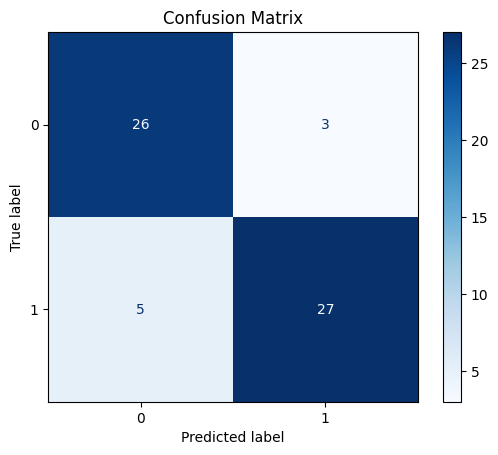

In [12]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

📝 Classification Report

In [13]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

